In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import plotly.express as px
import imageio

In [3]:
df = pd.read_csv('data/GlobalTemperatures.csv', parse_dates=True, index_col='dt') 
df.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_1900 = df[df.index>='1915-01-01'].resample('YS').mean().dropna()

df_1900.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1915-01-01,8.593167,0.246167,14.474167,0.399000,2.643750,0.345417,15.143750,0.134250
1916-01-01,8.225250,0.260417,14.097167,0.323917,2.262500,0.326833,14.901333,0.134833
1917-01-01,8.023333,0.260667,13.925917,0.319500,2.019583,0.313750,14.809750,0.140500
1918-01-01,8.130833,0.268250,13.961083,0.286417,2.185667,0.371000,14.959833,0.148167
1919-01-01,8.382250,0.266750,14.156333,0.341250,2.451083,0.339333,15.006750,0.142833


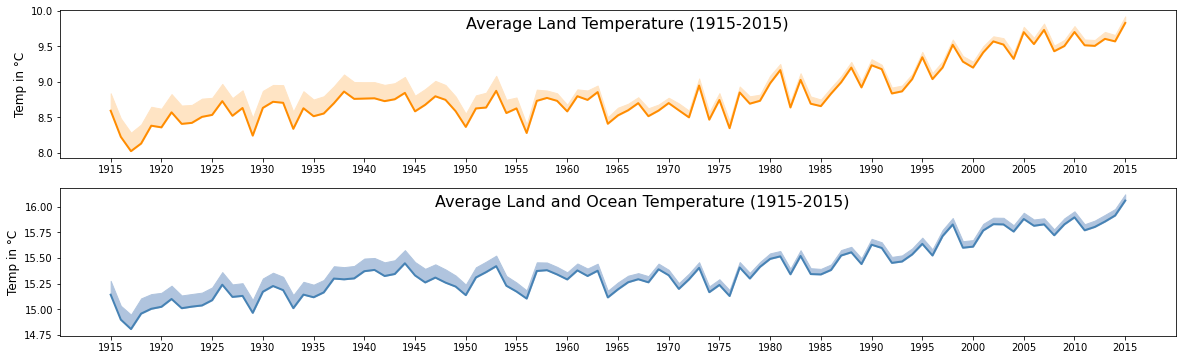

In [16]:
fig, ax = plt.subplots(figsize=(20,6))
plt.subplot(211)

plt.plot(df_1900.index.strftime('%Y'),df_1900['LandAverageTemperature'], color='darkorange', lw=2);
plt.fill_between(x=df_1900.index.strftime('%Y'), color='bisque', \
                 y1=df_1900['LandAverageTemperature'], \
                 y2=df_1900['LandAverageTemperature']+df_1900['LandAverageTemperatureUncertainty']);
plt.xticks(np.arange(0, len(plt.xticks()[0]), 5));
plt.ylabel('Temp in °C', fontsize=12)
plt.text(s='Average Land Temperature (1915-2015)', fontsize=16, x=35, y=9.75)

plt.subplot(212)
plt.plot(df_1900.index.strftime('%Y'),df_1900['LandAndOceanAverageTemperature'], color='steelblue', lw=2);
plt.fill_between(x=df_1900.index.strftime('%Y'), color='lightsteelblue', \
                 y1=df_1900['LandAndOceanAverageTemperature'], \
                 y2=df_1900['LandAndOceanAverageTemperature']+df_1900['LandAndOceanAverageTemperatureUncertainty']);
plt.xticks(np.arange(0, len(plt.xticks()[0]), 5));
plt.ylabel('Temp in °C', fontsize=12)
plt.text(s='Average Land and Ocean Temperature (1915-2015)', fontsize=16, x=32, y=16)
plt.savefig('images/average-temp.png')

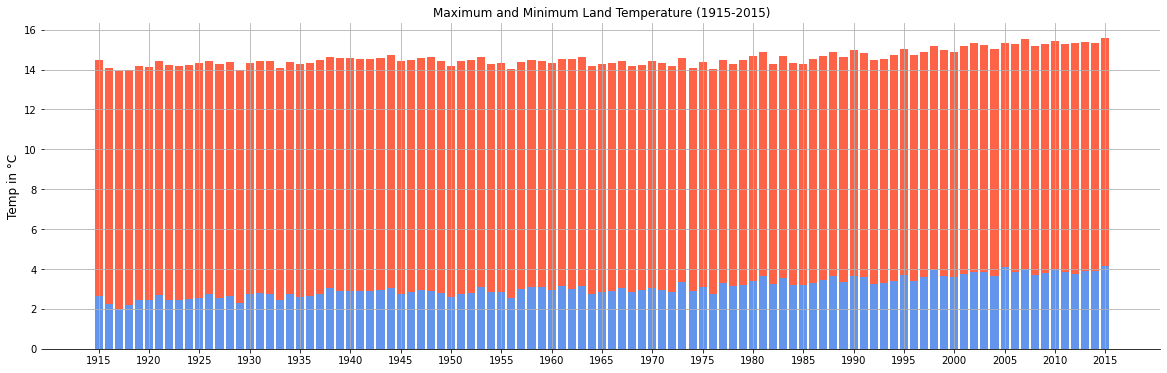

In [17]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.bar(df_1900.index.strftime('%Y'), df_1900['LandMaxTemperature'], color='tomato',) \
#        yerr=df_1900['LandMaxTemperatureUncertainty'])
plt.bar(df_1900.index.strftime('%Y'), df_1900['LandMinTemperature'], color='cornflowerblue') \
#        yerr=df_1900['LandMinTemperatureUncertainty'])

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid()
plt.xticks(np.arange(0, len(plt.xticks()[0]), 5));
plt.ylabel('Temp in °C', fontsize=12)
plt.title('Maximum and Minimum Land Temperature (1915-2015)')
plt.savefig('images/max-min-temp.png')

In [22]:
data_src = requests.get('https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3').text
soup = BeautifulSoup(data_src, 'lxml')
iso_list = soup.find('div', class_='plainlist')
iso_dict = {}

for item in iso_list.find_all('li'):
    iso_dict[item.a.text.strip()] = item.span.text.strip()
    
iso_dict

{'Aruba': 'ABW',
 'Afghanistan': 'AFG',
 'Angola': 'AGO',
 'Anguilla': 'AIA',
 'Åland Islands': 'ALA',
 'Albania': 'ALB',
 'Andorra': 'AND',
 'United Arab Emirates': 'ARE',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'American Samoa': 'ASM',
 'Antarctica': 'ATA',
 'French Southern Territories': 'ATF',
 'Antigua and Barbuda': 'ATG',
 'Australia': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Burundi': 'BDI',
 'Belgium': 'BEL',
 'Benin': 'BEN',
 'Bonaire, Sint Eustatius and Saba': 'BES',
 'Burkina Faso': 'BFA',
 'Bangladesh': 'BGD',
 'Bulgaria': 'BGR',
 'Bahrain': 'BHR',
 'Bahamas': 'BHS',
 'Bosnia and Herzegovina': 'BIH',
 'Saint Barthélemy': 'BLM',
 'Belarus': 'BLR',
 'Belize': 'BLZ',
 'Bermuda': 'BMU',
 'Bolivia (Plurinational State of)': 'BOL',
 'Brazil': 'BRA',
 'Barbados': 'BRB',
 'Brunei Darussalam': 'BRN',
 'Bhutan': 'BTN',
 'Bouvet Island': 'BVT',
 'Botswana': 'BWA',
 'Central African Republic': 'CAF',
 'Canada': 'CAN',
 'Cocos (Keeling) Islands': 'CCK',
 'Switzerland': 'CHE',


In [24]:
df_country = pd.read_csv('data/GlobalLandTemperaturesByCountry.csv', parse_dates=True, index_col='dt') 
df_country.tail()

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
2013-05-01,19.059,1.022,Zimbabwe
2013-06-01,17.613,0.473,Zimbabwe
2013-07-01,17.000,0.453,Zimbabwe
2013-08-01,19.759,0.717,Zimbabwe
2013-09-01,NaN,NaN,Zimbabwe


In [27]:
map_data = pd.DataFrame()
for year in np.arange(1880,2010,step=10):
    start='{}-01-01'.format(year)
    end='{}-12-31'.format(year+9)
    
    df_year = df_country[start:end][['AverageTemperature','Country']]
    df_year = df_year.groupby('Country').mean().reset_index().dropna()
    df_year['AverageTemperature'].astype('float64')
    df_year = df_year.rename(columns={'AverageTemperature':'AverageTemperature{}'.format(year)})
    #print(start,end)
    
    if map_data.shape[0]==0:
        map_data=df_year
    else:
        map_data=map_data.merge(df_year, left_on='Country', right_on='Country')
        
map_data.head()

,Country,AverageTemperature1880,AverageTemperature1890,AverageTemperature1900,AverageTemperature1910,AverageTemperature1920,AverageTemperature1930,AverageTemperature1940,AverageTemperature1950,AverageTemperature1960,AverageTemperature1970,AverageTemperature1980,AverageTemperature1990,AverageTemperature2000
0,Afghanistan,13.673100,13.742667,13.718942,13.819850,13.706792,13.691550,14.386883,14.000892,13.961283,14.035983,14.595183,14.732458,15.365650
1,Africa,23.543983,23.689842,23.707575,23.880908,24.027567,24.155042,24.250850,24.099275,24.155550,24.151075,24.428567,24.626283,24.891983
2,Albania,12.230917,12.317100,12.444833,12.555075,12.822600,12.897350,12.667342,12.999192,12.919900,12.610950,12.775675,13.149892,13.529558
3,Algeria,22.516083,22.790192,22.648067,22.735067,22.995742,23.200767,23.259642,23.092575,23.232308,22.929833,23.515033,23.651742,24.192267
4,American Samoa,25.835407,26.092050,26.173558,26.193825,26.399842,26.734708,26.766642,26.773925,26.650492,26.756117,26.911825,27.103125,27.246783


In [28]:
start='2010-01-01'.format(year)
df_year = df_country[start:][['AverageTemperature','Country']]
df_year = df_year.groupby('Country').mean().reset_index().dropna()
df_year['AverageTemperature'].astype('float64')
df_year = df_year.rename(columns={'AverageTemperature':'AverageTemperature2010'})

map_data=map_data.merge(df_year, left_on='Country', right_on='Country')
map_data.set_index('Country', inplace=True)
map_data.head()

,AverageTemperature1880,AverageTemperature1890,AverageTemperature1900,AverageTemperature1910,AverageTemperature1920,AverageTemperature1930,AverageTemperature1940,AverageTemperature1950,AverageTemperature1960,AverageTemperature1970,AverageTemperature1980,AverageTemperature1990,AverageTemperature2000,AverageTemperature2010
Country,,,,,,,,,,,,,,
Afghanistan,13.673100,13.742667,13.718942,13.819850,13.706792,13.691550,14.386883,14.000892,13.961283,14.035983,14.595183,14.732458,15.365650,15.504727
Africa,23.543983,23.689842,23.707575,23.880908,24.027567,24.155042,24.250850,24.099275,24.155550,24.151075,24.428567,24.626283,24.891983,25.033841
Albania,12.230917,12.317100,12.444833,12.555075,12.822600,12.897350,12.667342,12.999192,12.919900,12.610950,12.775675,13.149892,13.529558,13.904409
Algeria,22.516083,22.790192,22.648067,22.735067,22.995742,23.200767,23.259642,23.092575,23.232308,22.929833,23.515033,23.651742,24.192267,24.562455
American Samoa,25.835407,26.092050,26.173558,26.193825,26.399842,26.734708,26.766642,26.773925,26.650492,26.756117,26.911825,27.103125,27.246783,27.275227


In [30]:
def get_iso_country_code(name):
    if name in iso_dict.keys():
        return iso_dict.get(name)
    else:
        return np.nan

In [39]:
for i in range(len(map_data.columns)-1):
    if i<len(map_data.columns)-1:
        col_name1 = map_data.columns[i]
        col_name2 = map_data.columns[i+1]
        #print(col_name1,col_name2)
        df_year = map_data[col_name2]-map_data[col_name1]
        #df_year = df_year.rename(columns={0:'Temp Change'})
        df_year = df_year.reset_index().dropna()
                
        df_year['Country'] = df_year['Country'].replace('United Kingdom', \
                                            'United Kingdom of Great Britain and Northern Ireland')
        df_year['Country'] = df_year['Country'].replace('United States', \
                                                    'United States of America')
        df_year['Country'] = df_year['Country'].replace('Bolivia', \
                                                    'Bolivia (Plurinational State of)')
        df_year['Country'] = df_year['Country'].replace('Venezuela', \
                                                    'Venezuela (Bolivarian Republic of)')
        df_year['Country'] = df_year['Country'].replace('Tanzania', \
                                                    'Tanzania, United Republic of')
        df_year['Country'] = df_year['Country'].replace('Congo (Democratic Republic Of The)', \
                                                    'Congo, Democratic Republic of the')
        df_year['Country'] = df_year['Country'].replace('Vietnam', 'Viet Nam')
        df_year['Country'] = df_year['Country'].replace('Laos', \
                                                    'Lao People''s Democratic Republic')
        df_year['Country'] = df_year['Country'].replace('Iran', \
                                                    'Iran (Islamic Republic of)')
        df_year['Country'] = df_year['Country'].replace('Russia', 'Russian Federation')
        df_year['Country'] = df_year['Country'].replace('South Korea', 'Korea, Republic of')

        df_year['Country'] = df_year['Country'].apply(lambda x : x.replace(' (Europe)',''))
        df_year["ISO"] = df_year['Country'].apply(get_iso_country_code)
        df_year.columns = ['Country','Temp Change', 'ISO']
        
        col_name1 = map_data.columns[i][-4:]
        col_name2 = map_data.columns[i+1][-4:]
        title ='Average Temperature change from {}s - {}s'.format(col_name1,col_name2)
        
        fig = px.choropleth(df_year, locations="ISO", scope='world',
                    color="Temp Change", 
                    hover_name="Country", # column to add to hover information
                    range_color=(-2, 2),
                    color_continuous_scale=px.colors.diverging.BrBG_r
                    )
     
        fig.update_layout(title_text=title, showlegend=False, autosize=True, font={'size':18}, height=800, width=1000, \
                         coloraxis={'colorbar':{'thickness':20, 'ypad':2, 'tickfont':{'size':14}, \
                                                'title':{'text':'°C', 'font':{'size':16}}}})

        fig.update_geos(visible=False, resolution=50, showlakes=False, showrivers=False, \
                       showframe=False, showcoastlines=False, projection_type='equirectangular')

        fig.write_image("images/{}.png".format(i))

In [38]:
images = []
for filename in range(len(map_data.columns)-1):
    filename = 'images\{}.png'.format(filename)
    images.append(imageio.imread('{}'.format(filename)))
imageio.mimsave('images\movie.gif', images, duration=1.2)

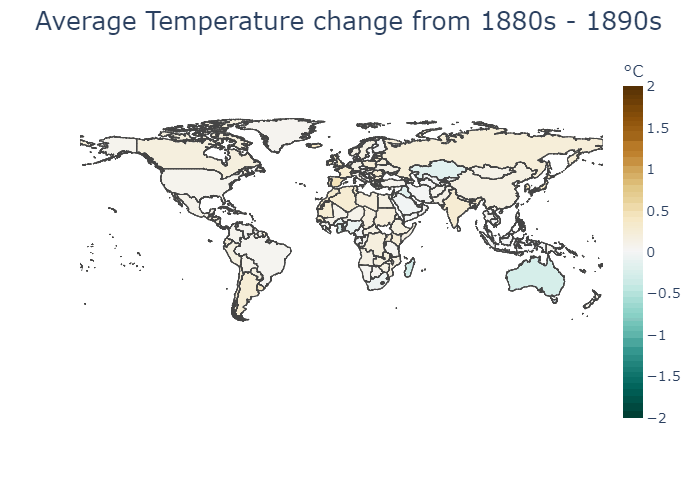